In [1]:
import numpy as np

from kitaev import *
from tqdm import tqdm

hi


In [2]:
N_global = 200
d_global = 2
h_1 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=0*t),v=offsite(_delta=1*t, _t=t))
h_2 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=1*t),v=offsite(_delta=1*t, _t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_T = np.linspace(0.02, 0.98, 96)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd.append((G_0_pos - G_0_neg)/2)
    G_0_even.append((G_0_pos + G_0_neg)/2)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((-1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg)/2)
    G_pi_even.append((G_pi_pos + G_pi_neg)/2)

100%|██████████| 96/96 [04:23<00:00,  2.74s/it]


In [3]:
"""G_0_odd = np.array(G_0_odd)
G_0_even = np.array(G_0_even)
G_pi_odd = np.array(G_pi_odd)
G_pi_even = np.array(G_pi_even)
"""
f_0_odd = [(G_0_odd[i][0,1].imag) for i in range(len(G_0_odd))]
f_0_even = [(G_0_even[i][0,1].imag) for i in range(len(G_0_even))]
f_pi_odd = [(G_pi_odd[i][0,1].imag) for i in range(len(G_pi_odd))]
f_pi_even = [(G_pi_even[i][0,1].imag) for i in range(len(G_pi_even))]
print(len(G_0_odd))

96


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


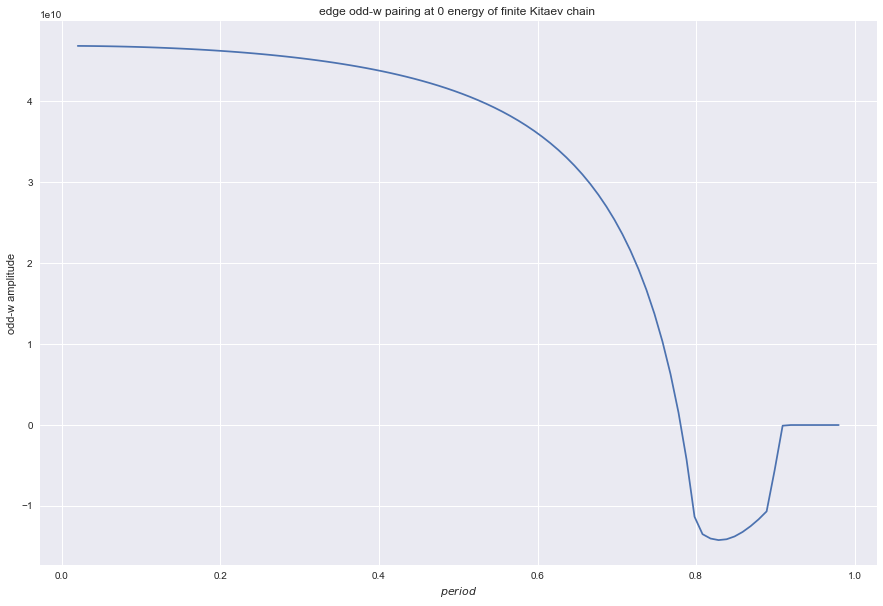

In [4]:
plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,f_0_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


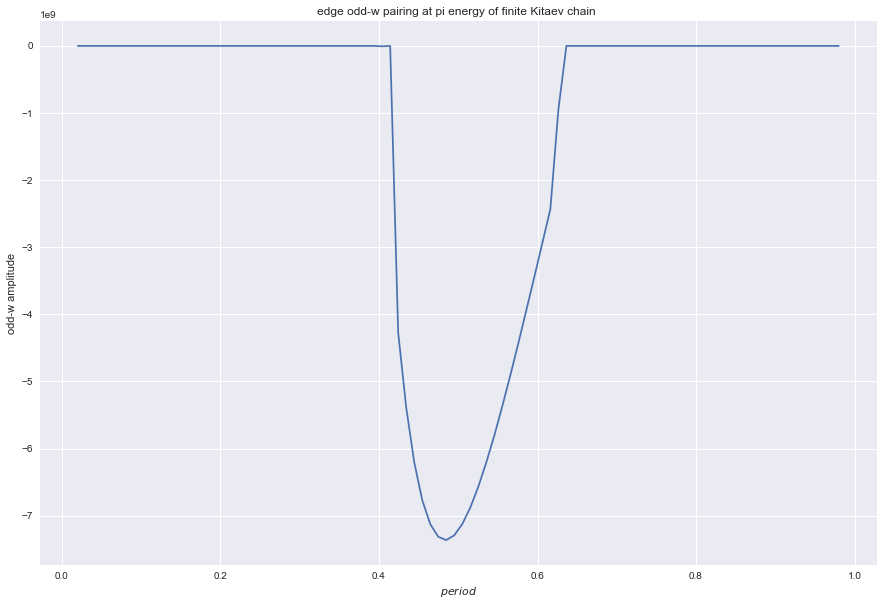

In [5]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


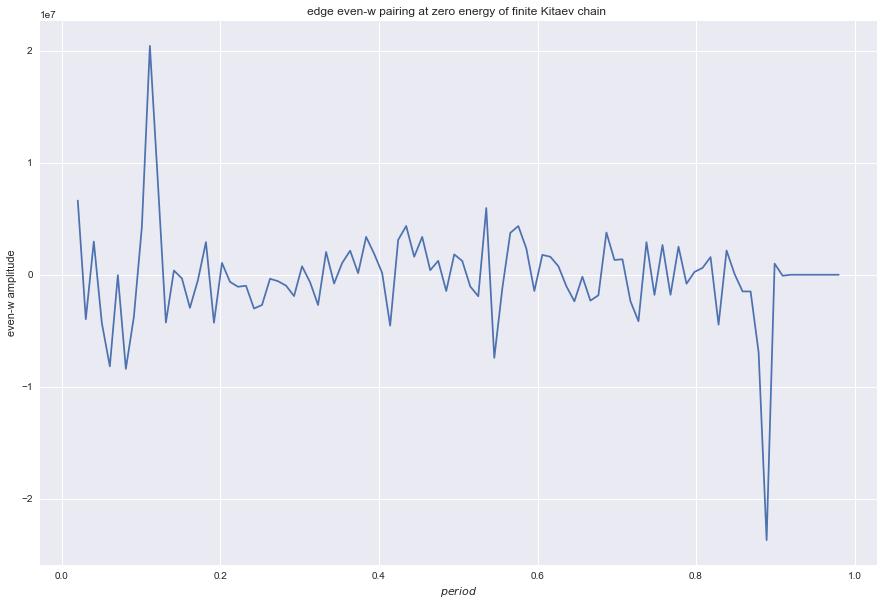

In [6]:
plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,f_0_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


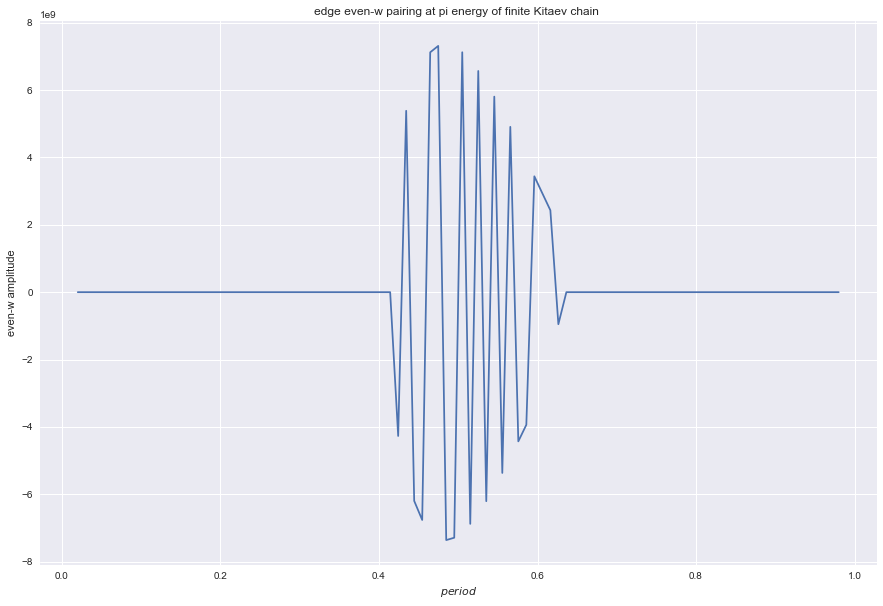

In [7]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


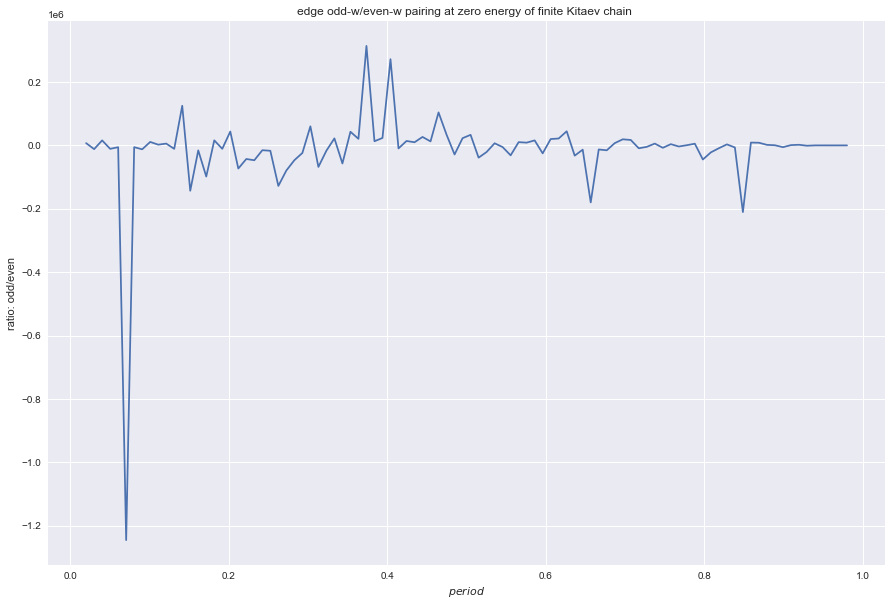

In [8]:
plt.title("edge odd-w/even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,[f_0_odd[i]/f_0_even[i] for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


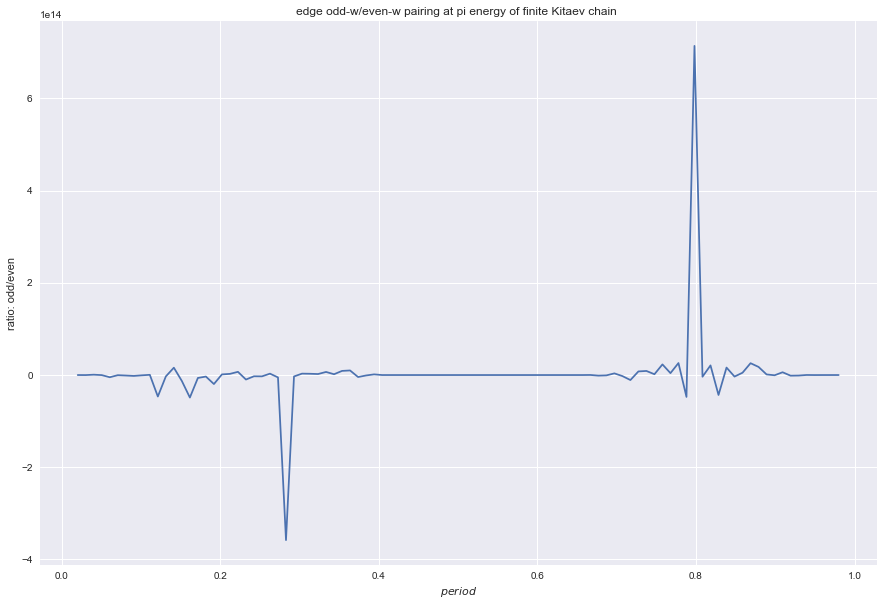

In [9]:
plt.title("edge odd-w/even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,[f_pi_odd[i]/f_pi_even[i] for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [10]:
N = 1000
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
d, V= np.linalg.eig(U)
np.isclose( np.diag(d) ,V.conj().T @ U @ V)

TypeError: onsite() got an unexpected keyword argument 'mu'

In [ ]:
N = 1000
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
eval, evec= la.eig(U)
h_f1 =evec @ np.diag(np.log(eval)*1j/np.pi) @ la.inv(evec)
#np.isclose( np.diag(d) ,V.conj().T @ U @ V)

In [ ]:
h_f2 = floquet_hamiltonian([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)

In [ ]:
np.testing.assert_allclose(h_f1,h_f2,atol=1e-8,rtol=1e-5)


In [ ]:
np.isclose(h_f1,h_f2)